In [1]:
import sys
sys.path.insert(0, 'C:/Users/Lenovo/Desktop/exam_eti/containerized_tool/data_analysis_tool/src')

In [2]:
import mysql_analyzer
import eda_maker
import mysql.connector
import pandas as pd
from mysql.connector.errors import Error
import dat
from faker import Faker
import random
import json
from json import dumps
from json import loads
import time
from datetime import datetime
from kafka import KafkaProducer, TopicPartition, KafkaConsumer
import xlsxwriter
import openpyxl
import os

working


In [3]:
eda = eda_maker.EdaHelper('localhost',os.environ['MYSQLSERVER_USER'],
                os.environ['MYSQLSERVER_PASS'],'sakila')

In [4]:
eda.sql_query("SHOW TABLES")

[('actor',),
 ('actor_info',),
 ('address',),
 ('category',),
 ('city',),
 ('country',),
 ('customer',),
 ('customer_list',),
 ('customers_change_events',),
 ('film',),
 ('film_actor',),
 ('film_category',),
 ('film_list',),
 ('film_text',),
 ('inventory',),
 ('language',),
 ('latest_cdc_timestamp',),
 ('nicer_but_slower_film_list',),
 ('payment',),
 ('rental',),
 ('sales_by_film_category',),
 ('sales_by_store',),
 ('staff',),
 ('staff_list',),
 ('store',),
 ('users_change_events',)]

In [5]:
eda.filter_numeric_cols("SELECT * FROM payment")

C:\Users/Lenovo/Desktop/exam_eti/containerized_tool/data_analysis_tool/src\eda_maker\eda_tool.py:59: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  num_cols = list(pd.read_sql_query(


['payment_id', 'customer_id', 'staff_id', 'rental_id', 'amount']

In [6]:
eda.filter_categorical_cols("SELECT * FROM payment")

C:\Users/Lenovo/Desktop/exam_eti/containerized_tool/data_analysis_tool/src\eda_maker\eda_tool.py:54: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f'{sql_command}', con=self.db)


['payment_date', 'last_update']

C:\Users/Lenovo/Desktop/exam_eti/containerized_tool/data_analysis_tool/src\eda_maker\eda_tool.py:73: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(
C:\Users/Lenovo/Desktop/exam_eti/containerized_tool/data_analysis_tool/src\eda_maker\eda_tool.py:76: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  plt.figtext(1.15, 0.15, pd.read_sql_query(


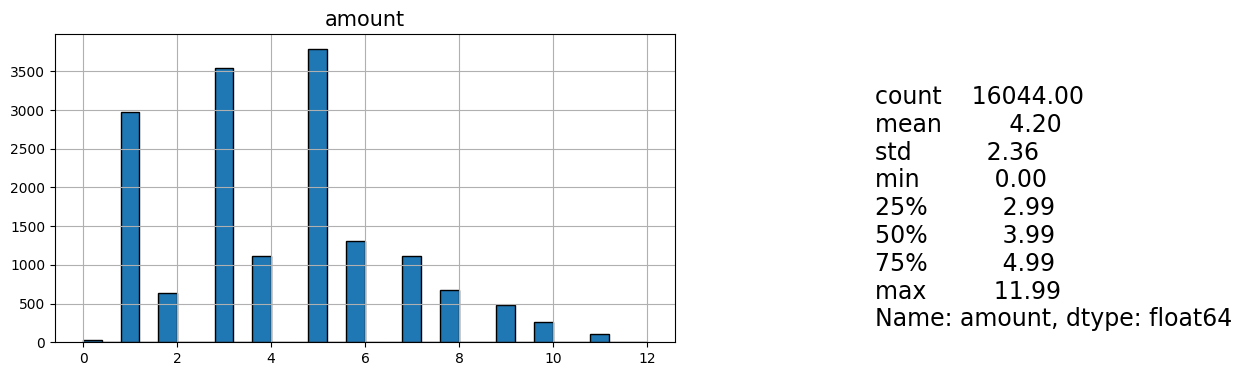

In [7]:
eda.desc_uni_num_feature('payment_date',"SELECT * FROM payment")

In [ ]:
eda.desc_uni_cat_feature('amount',"SELECT * FROM payment")

## Initiating mysql_analyzer class

In [3]:
mysql_works = mysql_analyzer.mysql_profiler('localhost',os.environ['MYSQLSERVER_USER'],
                os.environ['MYSQLSERVER_PASS'],'sakila')

## Exercises works on mysql_analyzer module`s below methods to demonstrate OOP skills

In [ ]:
mysql_works.multiple_dataset_apply_containing_cols_mysql()

In [ ]:
mysql_works.find_value_mysql('Hillyer')

In [ ]:
mysql_works.multiple_dataset_apply_mysql_query('SELECT * FROM criket_table')

In [ ]:
mysql_works.multiple_dataset_apply_mysql_query('SELECT team, COUNT(team) as game_played,\
                                          CAST(SUM(CASE WHEN team=WonBy THEN 1 ELSE 0 END)AS SIGNED) AS game_won FROM\
                                         (SELECT TeamA AS team, WonBy from criket_table\
                                         UNION ALL\
                                         SELECT TeamB AS team, WonBy from criket_table) AS sub\
                                         GROUP BY team\
                                         ORDER BY game_won'
                                         )